In [1]:
import numpy as np
import george
from george import kernels
import schwimmbad
from dynesty import plotting as dyplot
import dynesty
import time
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [16]:
fitdata=np.load("../notebooks/2d_fitdata_23.npy")
with open ('../grid_metadata/grid23_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
logM_disk=fitdata[:,0]
logR_disk=fitdata[:,1]
w2=fitdata[:,2+2]
yerr=np.array([j*0.01 for j in w2])

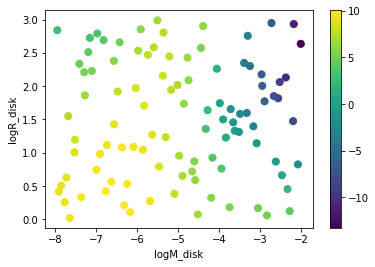

In [17]:
style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(logM_disk,logR_disk, c=w2, s=50, **style)
plt.xlabel("logM_disk")
plt.ylabel("logR_disk")
plt.colorbar()
plt.show()

In [19]:
x=np.transpose(coords)
kernel = np.var(w2) * kernels.ExpSquaredKernel(3**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(1**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

#x0pred,x1pred=np.meshgrid(np.linspace(-8, -2, 100),np.linspace(0, 3, 100))
#x_pred=list(map(lambda x, y:(x,y), np.ndarray.flatten(x0pred), np.ndarray.flatten(x1pred)))
#pred, pred_var = gp.predict(w2, x_pred, return_var=True)

#plt.figure(figsize=(9,7))
#style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
#plt.scatter(np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred, s=20, **style)
#plt.colorbar()
#plt.scatter(x[:, 0], x[:, 1], c=w2, s=50, **style)

#plt.show()

#fig = plt.figure(figsize=(16,12))
#ax = fig.add_subplot(111,projection='3d')

# Plot the surface.

#surf = ax.plot_surface(x0pred,x1pred,pred.reshape(100,100),cmap=cm.viridis)
    
#ax.set_ylabel("logRdisk")
#ax.set_xlabel("logMdisk")
#ax.view_init(40, 130)
#plt.show()


Initial ln-likelihood: -556.24
[2.80426535 2.19722458 0.        ]
[4.06385762 3.         1.        ]


In [20]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        print(p)
        return -100000
        

def ptform(u):
    #  [-50,50] [-1.3,3.6] [-4.6,2.2]
    return [u[0]*10 -5, u[1]*4.9-1.3 , u[2]*6.8-4.6 ]


In [7]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=None)


In [70]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

iter: 9330 | +1000 | bound: 10 | nc: 1 | ncall: 50101 | eff(%): 20.618 | loglstar:   -inf < -53.833 <    inf | logz: -63.071 +/-  0.142 | dlogz:  0.001 >  1.009                                      

429.0171699523926


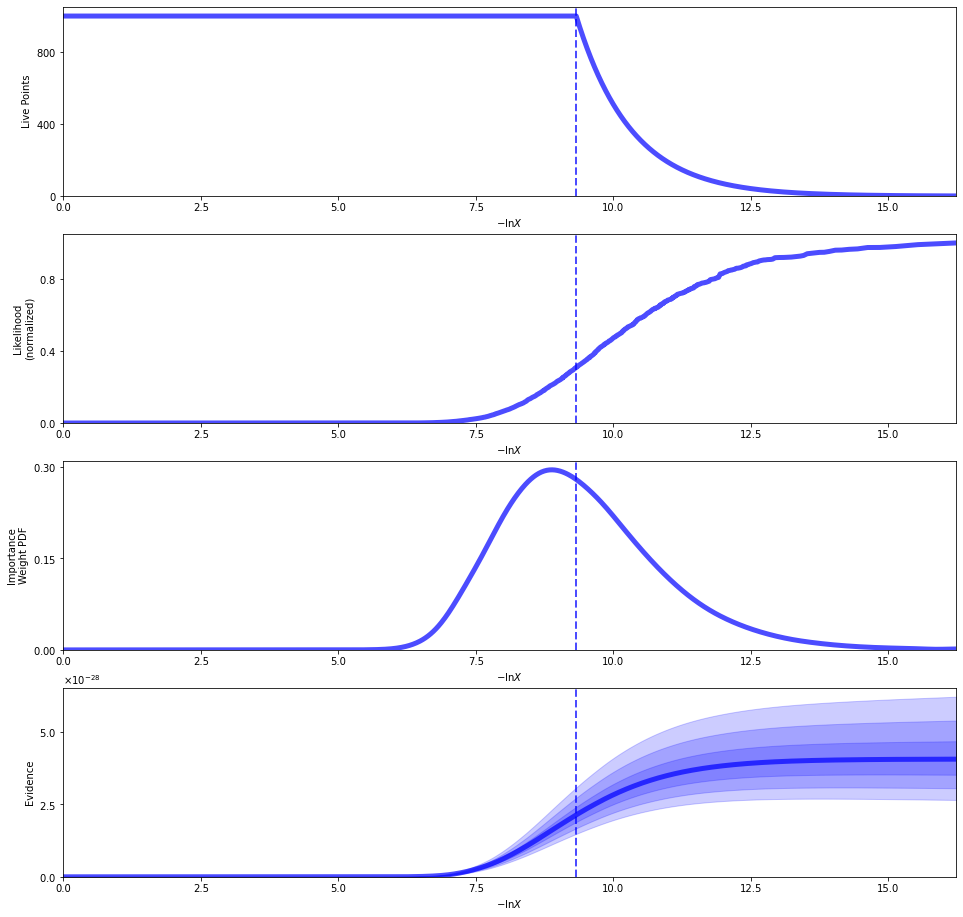

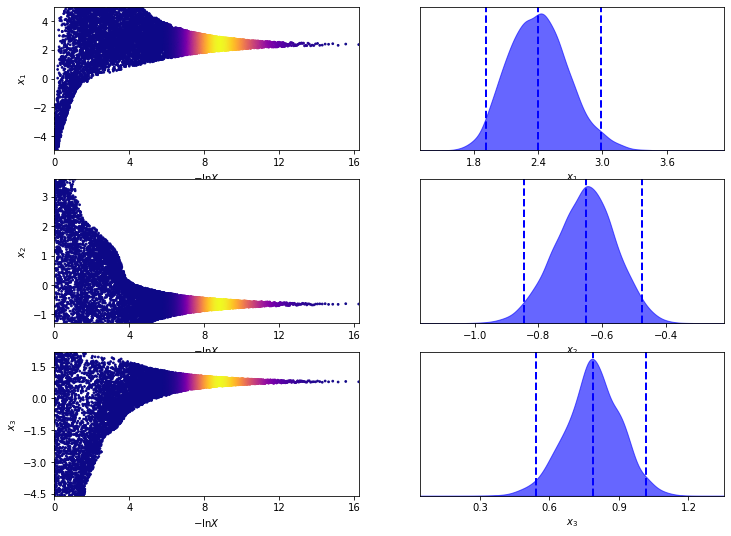

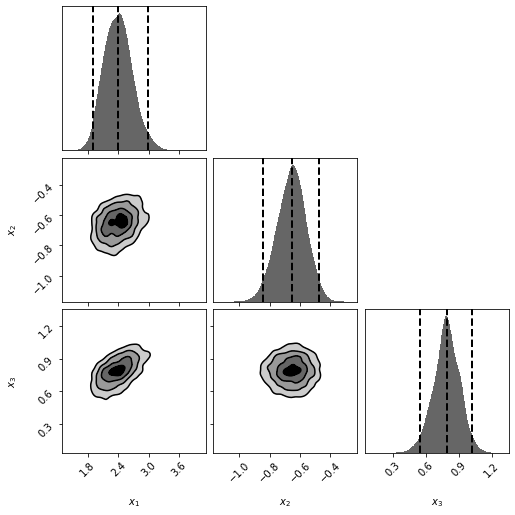

In [72]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

In [73]:
def ptform(u):
    #  [-5,5] [-1.3,3.6] [-4.6,2.2]
    return [u[0]*10 -5, u[1]*4.9-1.3 , u[2]*6.8-4.6 ]

sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
presults = sampler.results

iter: 9431 | +1000 | bound: 10 | nc: 1 | ncall: 50908 | eff(%): 20.490 | loglstar:   -inf < -53.840 <    inf | logz: -63.174 +/-  0.143 | dlogz:  0.001 >  1.009                                      

167.4134545326233


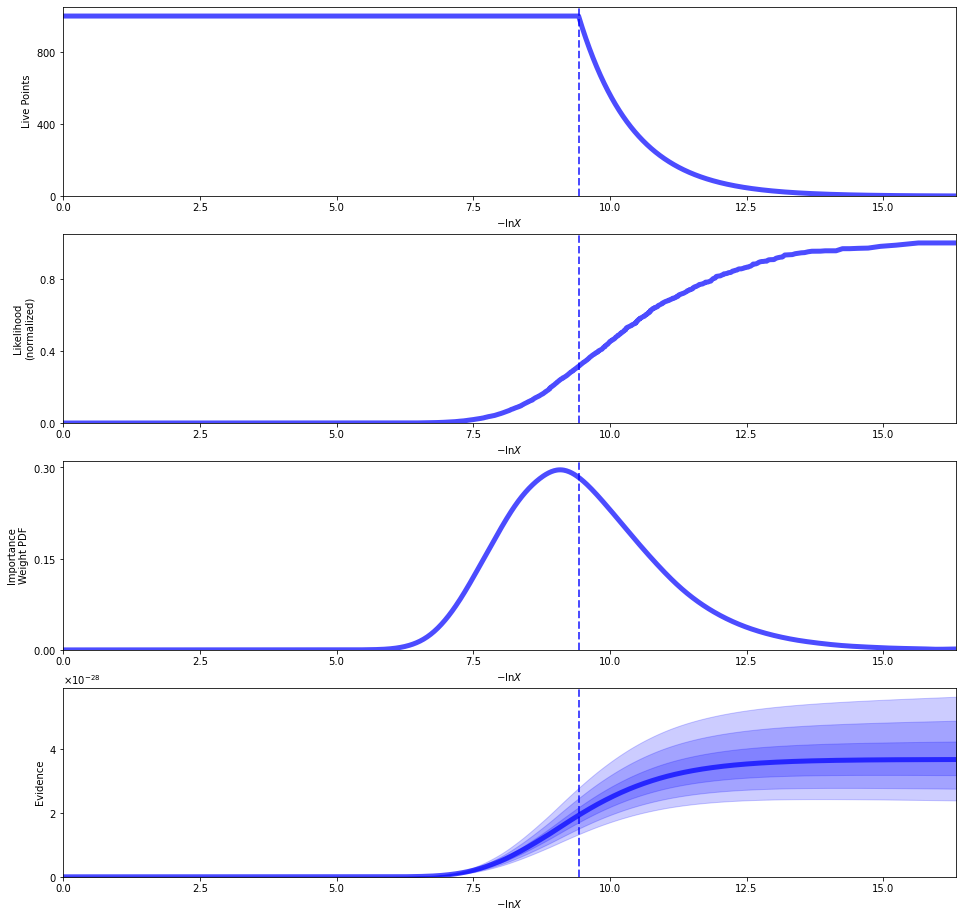

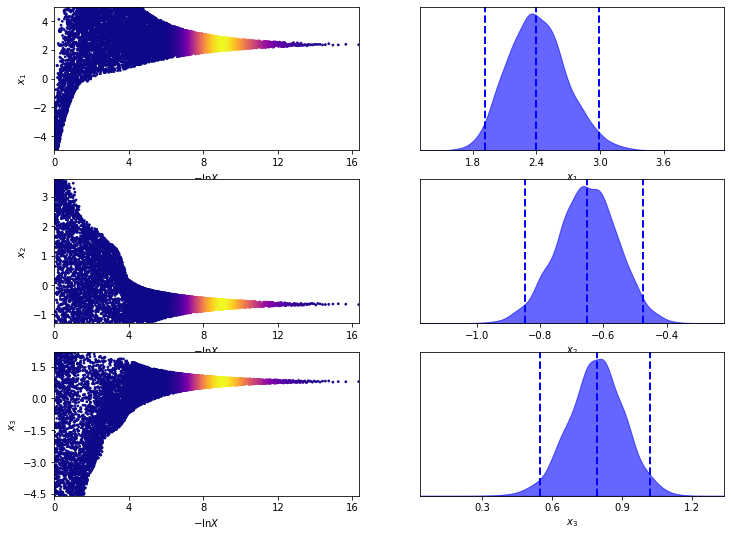

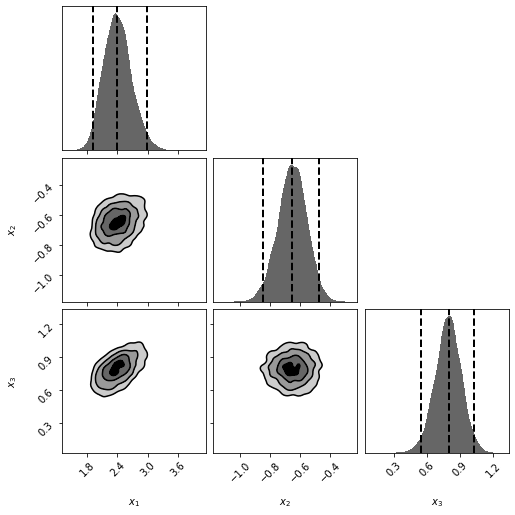

In [74]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(presults)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(presults)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(presults)

In [78]:
def ptform(u):
    #  [-50,50] [-1.3,3.6] [-4.6,2.2]
    return [u[0]*100-50, u[1]*4.9-1.3 , u[2]*6.8-4.6 ]
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=None)

In [79]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
presults = sampler.results

iter: 11635 | +1000 | bound: 15 | nc: 1 | ncall: 58890 | eff(%): 21.455 | loglstar:   -inf < -53.837 <    inf | logz: -65.369 +/-    nan | dlogz:  0.001 >  1.009                                     

291.1751961708069


In [21]:
def ptform(u):
    #  [-50,50] [-1.3,3.6] [-4.6,2.2]
    return [u[0]*100-50, u[1]*4.9-1.3 , u[2]*6.8-4.6 ]

sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

[29.69116185  1.43101958  2.03793082][46.19958105  2.12932087  0.45723376]

[30.11087856  2.32091847  0.81273433][39.00255408  2.41531834  0.21335629][24.33407382  3.02004703  1.06603097][28.16065436  2.14772903 -0.00010326][42.2737866   2.31749624  1.43035981][41.40369204  3.47710734 -0.90266944][36.81042948  1.73519599  1.94138543]
[47.46305414  0.70522351  1.75617321]




[46.82266931  1.19388004  1.77687347]
[40.73128336  3.54086845  0.95603571]
[32.79415335  1.50970759  1.70653716]

[43.72511366  1.73617473  0.17279029]
[48.8100168   2.41490883  1.72695253][30.61382027  2.90844712  0.66360061]
[37.73496537  3.40988834  0.25159028]


[32.06288946  1.16361036  1.80336056][35.92857058  1.57154255  0.79811595][49.70058115  3.29812238  2.16575077]


[41.41117175  2.87801148  1.40301255][30.77503464  2.9228995   1.04658917][32.16942096  1.75128995  1.06199036][28.47084887  1.40299641  1.43369282]
[49.19962285  0.8866054   1.90165074]
[46.52787998  0.38498475  1.94124319]


[31.39973226 

[36.9233246   1.07016056  0.19467068]
[48.62101481  2.6946427   0.62309121][28.5375096   3.07564396 -0.40519541]

[32.50640347  1.62688347 -0.07691902]
[46.93656468  3.429575   -0.55653387]
[43.29220613  3.01360348  1.71524508]
[34.74348804  2.47948228  0.64638239]
[31.91168751  0.81517774  1.84864447][27.21162484  0.84853929  1.54218698][36.69170765  3.18739753 -1.14925644]


[37.16948342  3.42100246  2.17977864]
[42.65490596  3.17939769  0.24358644]
[48.42460113  1.37149869  2.17383555][24.37007811  3.4356312   1.04387275]

[47.50822995  1.55783455  0.9204026 ][26.69219125  1.99392735  1.86314345][36.90714461  2.19248901  1.83729315]

[24.45769218  3.07873046  1.35526169]

[40.05505475  3.47455678 -0.17506579]
[33.65402933  3.21686464 -0.56443586]
[41.03619517  3.18319321 -0.21399101]
[28.33703547  2.59600648  1.61512115]
[28.20782654  3.41863925  0.92066773][47.26212304  2.65999564 -0.40896614][27.14898023  2.97738998  0.6233424 ][34.39721278  0.33932956  1.95290169]



[46.84827248

[26.56858691  2.7363261   1.44588862]
[49.17346405  2.49947816  0.10617009]
[25.92462856  1.66264512  1.40971949][29.44437374  2.37118698  1.74689231]

[45.61814468  2.27941983  2.04342619]
[29.77602614  2.55276122  1.92260142]
[38.89971791  2.20056574  0.70870856]
[31.98143226  0.93996936  1.03058085][45.82338478  1.89331954 -0.30404968][27.83107454  0.50989926  1.96088499][39.20752333  1.56962094  1.01865952]



[48.58231348  2.64837052 -0.48079705]
[40.6858374   2.84150816  1.70852366]
[29.80617183  1.93418724  0.43004907][26.48479694  2.2400699   1.74523723]

[42.79786028  2.5067512   0.306836  ]
[39.51184806  0.96594269  1.3175915 ][26.05978263  2.1336562   0.35872892]

[37.84138518  0.9569464   1.16040089]
[37.01606766  0.95727395  0.77941189]
[25.84955613  2.20160379  0.06409327][27.47948685  2.59170886  0.56880619][49.38720325  3.3849413   1.9651388 ]


[43.11199958  1.02701743  0.63219325]
[48.41010812  3.56523578  1.58603424]
[40.88011966  1.7902859   0.26686102]
[36.09196557

[46.94482139  3.08784235 -0.23799192]
[41.98631528  2.893293   -0.61599263]
[39.60599659  2.40785098  1.11122245]
[29.08982591  3.0857227  -0.48072372]
[42.92429539  3.5473623  -1.18107997]
[29.0838121   3.18374964  1.73347399]
[49.75748436  3.58302772  0.49657011][40.62326156  3.21080745  1.37560136]

[37.94477368  1.73516873 -0.23861194]
[44.31336849  1.71340096  0.58221715][25.75029445  3.32512832  0.02375958]

[40.10105012  2.68070897  0.76563974]
[29.83816124  2.13645471  0.18377137][34.34294212  2.86199425 -0.50143706]

[43.98746643  1.42793079  1.38643246]
[39.377842    2.85063463  0.49616398]
[47.72923937  1.80657467  0.65369022]
[29.98766712  2.11243762  0.61163034][46.75666954  1.82930971  2.05434265]
[33.81575711  2.01074725 -0.25842037]

[29.41864356  2.7032456  -0.35722718]
[33.59140357  2.65541015  0.43276408][35.03228891  2.56253394 -0.3551767 ]

[31.34755548  2.5462396  -0.01603559]
[44.96060219  0.99959203  1.50759345]
[33.87336172  2.72590066  1.91424421]
[28.65544777

[33.9365367   2.36743097  2.12049298]
[43.49429893  2.8274805   0.87963481][41.27561579  3.50340842 -0.57662587]

[33.96184824  2.39223301  1.11574718][34.44598859  2.16656231  1.24223827]

[29.57500317  3.457038    1.80481483][36.78191473  3.17600063 -0.13818302]

[42.29327156  2.21727728  0.60089269]
[46.7300839   1.35011229  1.35756477]
[35.96402213  2.79979188  2.01654828]
[42.45278908  2.80650363  0.91701256][30.02057625  0.61945167  1.58602091][26.74356685  3.57370714  1.86077191]


[45.89901378  3.09614378 -0.21169632][34.63018075  0.67679067  1.47240671]

[37.54002284  1.53408351 -0.00389045]
[25.59448878  2.58387401  0.71997131]
[35.18459094  3.00087958  0.15562036]
[43.22827983  2.40263686  2.06661694]
[45.62028704  1.84343631  0.17169507][36.92553449  2.9937755  -0.08535774][45.07407004  3.52406691 -0.54684764]


[35.19007375  2.45861568  1.74740014]
[38.04654917  3.57421241 -0.79006651][38.24946281  1.11318186  2.03611093]

[29.13433971  2.33512223  0.66146417]
[27.40974014

[31.57037705  3.34853962  0.00728152]
[46.99571723  2.50259812  0.25809531][37.27243873  2.27647823  0.33101412]

[33.62549148  2.45720984  1.14316423][44.58151966  3.07910758 -0.39644394]

[47.65116279  2.86043885 -0.27207419][27.46847966  2.5489329   1.13178369]

[28.85972914  3.13964593  0.39709618]
[48.39475983  3.38895574  0.58239058]
[48.78559901  3.39340907  0.23824883][46.53410999  0.62592897  1.47675694][47.27977024  2.90017174  1.91815147]


[30.20150341  3.50477032 -1.32066237]
[45.54927809  3.14716179  1.46824972][43.78724684  1.92706859  0.74161293]

[40.8082046   0.86679427  2.16508695][37.90105083  3.0826624   0.68597963]

[43.38942916  2.90373756 -0.04282931]
[28.15348175  0.84494676  1.95625949]
[37.4666294   3.46197219  1.30286537]
[39.90614278  1.99267963 -0.39004929][42.38001179  3.28401854 -0.46893916][30.3350695   3.03397576  1.52933618][43.72510321  1.43616578  0.5653975 ]



[43.41353348  3.59868962  2.07488803][39.15384558  3.42622436  1.54479843]

[27.69308031

In [22]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)

iter: 11521 | +1000 | bound: 15 | nc: 1 | ncall: 58318 | eff(%): 21.470 | loglstar:   -inf < -53.835 <    inf | logz: -65.250 +/-  0.155 | dlogz:  0.001 >  1.009                                     

393.15076518058777


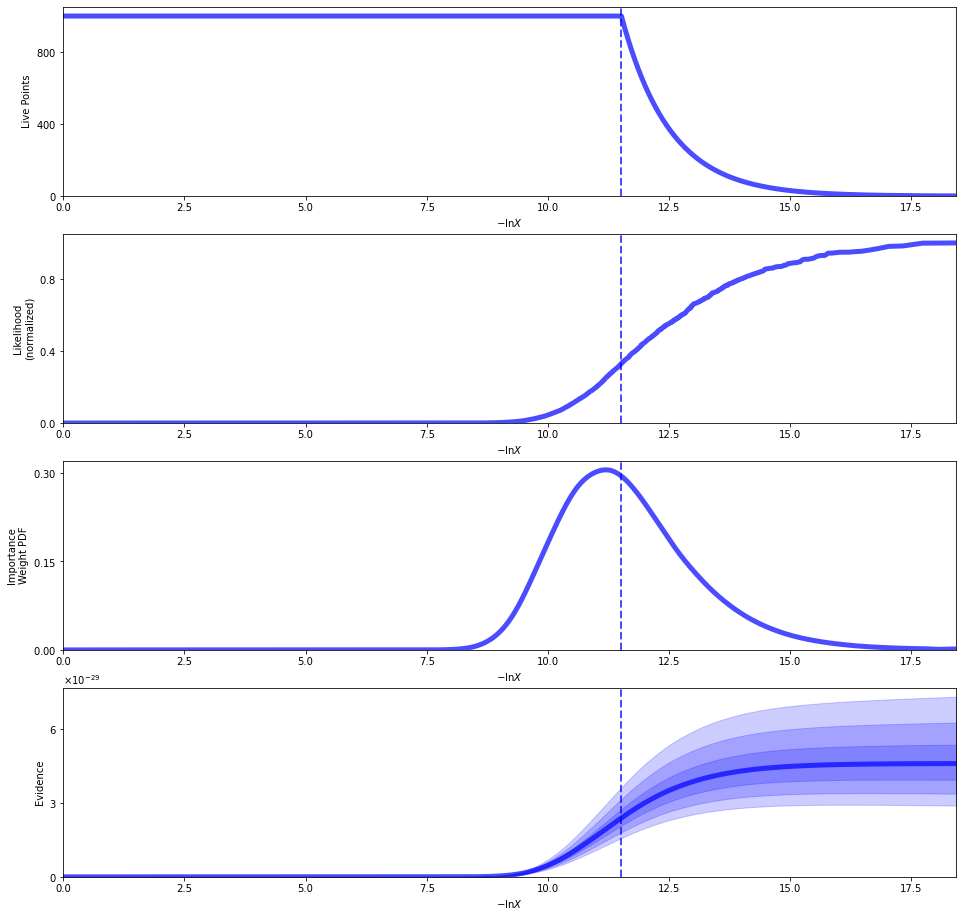

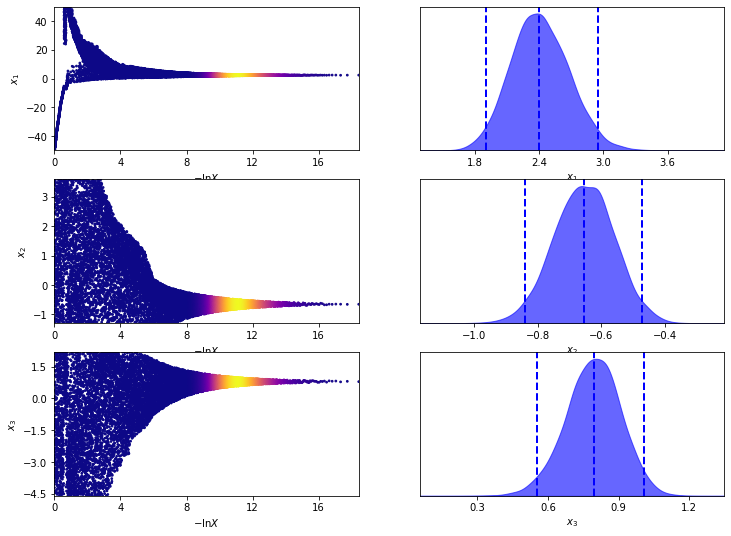

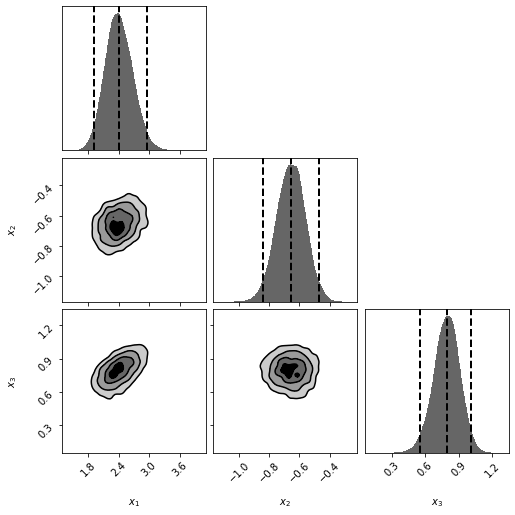

In [24]:
presults = sampler.results

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(presults)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(presults)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(presults)

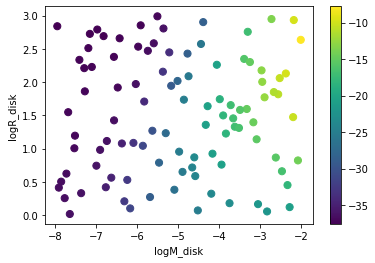

In [2]:
fitdata=np.load("../notebooks/2d_fitdata_23.npy")
with open ('../grid_metadata/grid23_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
logM_disk=fitdata[:,0]
logR_disk=fitdata[:,1]
w0=fitdata[:,2+0]
yerr=np.array([j*0.01 for j in w0])

style = dict(cmap='viridis', vmin=np.min(w0), vmax=np.max(w0))
plt.scatter(logM_disk,logR_disk, c=w0, s=50, **style)
plt.xlabel("logM_disk")
plt.ylabel("logR_disk")
plt.colorbar()
plt.show()

In [3]:
x=np.transpose(coords)
kernel = np.var(w0) * kernels.ExpSquaredKernel(3**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(1**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w0)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -149.47
[3.79081253 2.19722458 0.        ]
[6.65525166 3.         1.        ]


In [7]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w0)
    except:
        return -100000

def ptform(u):
    #  [-50,50] [-1.3,3.6] [-4.6,2.2]
    return [u[0]*100 -50, u[1]*4.9-1.3 , u[2]*6.8-4.6 ]

In [8]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

iter: 9897 | +1000 | bound: 11 | nc: 1 | ncall: 52691 | eff(%): 20.681 | loglstar:   -inf < -73.249 <    inf | logz: -83.050 +/-  0.145 | dlogz:  0.001 >  1.009                                      

286.2383849620819


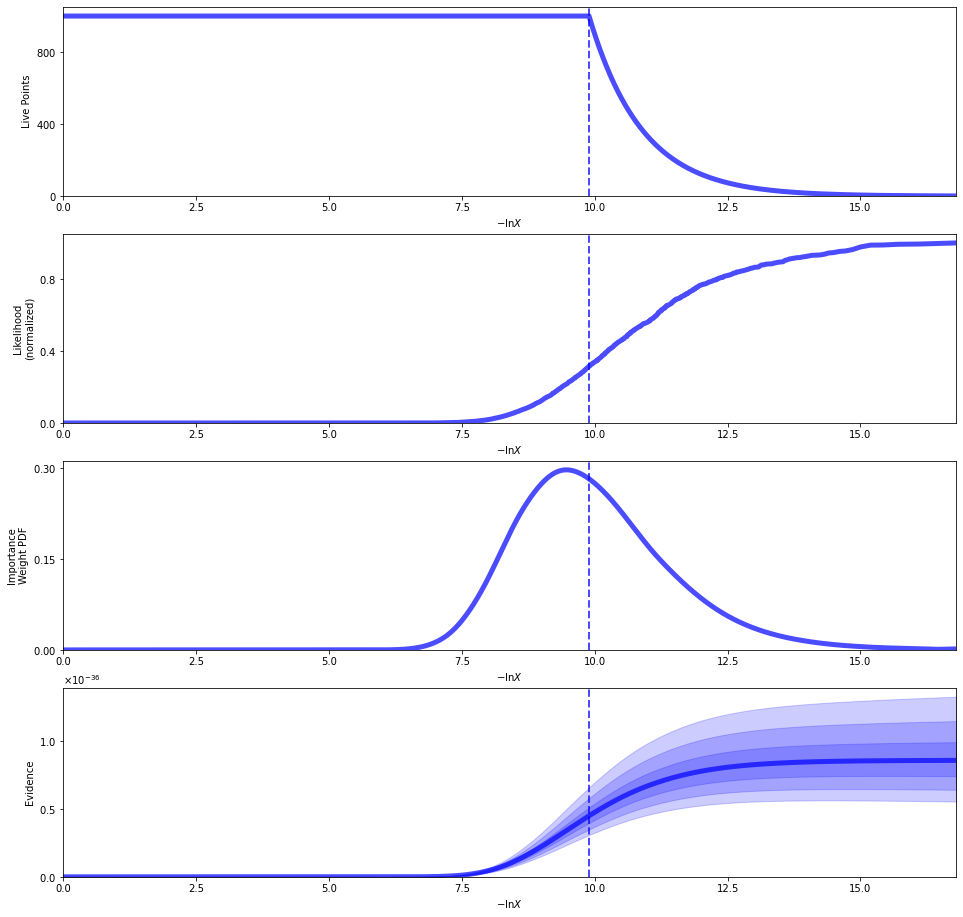

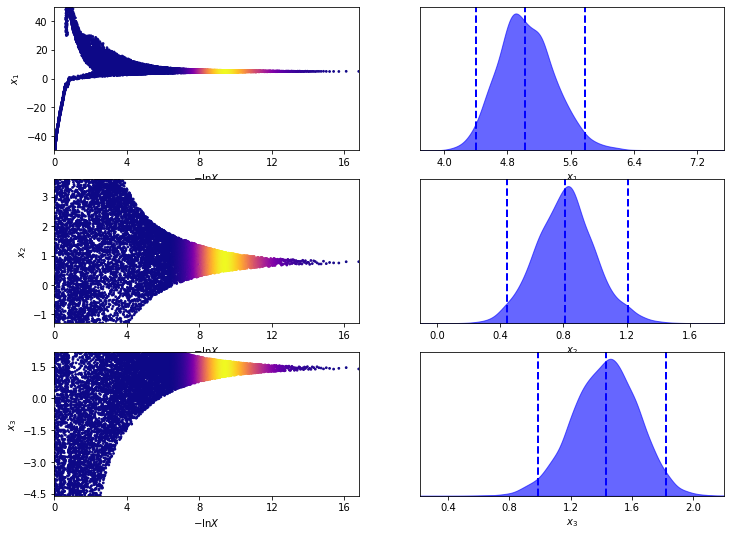

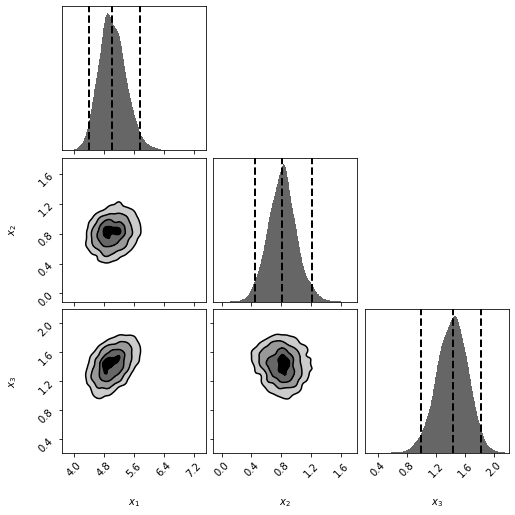

In [9]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)